In [22]:
from typing_extensions import TypedDict
from typing import Literal
import random
from dataclasses import dataclass


class TypedDictState(TypedDict):
    name:str
    programming_language:Literal["Python","JavaScript","C++"]

def start_project(state:TypedDictState)->TypedDictState:
    print(f"Starting project in {state['programming_language']}")
    return {"name":state["name"]+" starting project with "+state["programming_language"]}

def python_project(state:TypedDictState):
    print(f"Creating a python project with name {state['name']}")
    return {"programming_language":"Python"}

def javascript_project(state:TypedDictState):
    print(f"Creating a javascript project with name {state['name']}")
    return {"programming_language":"JavaScript"}

def cpp_project(state:TypedDictState):
    print(f"Creating a cpp project with name {state['name']}")
    return {"programming_language":"C++"}

def decide_pl(state:TypedDictState)->Literal["Python","JavaScript","C++"]:
    return random.choice(["Python","JavaScript","C++"])


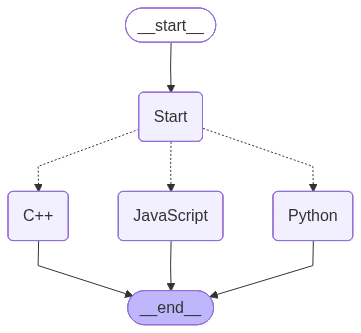

In [11]:

from IPython.display import Image, display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(TypedDictState)
builder.add_node("Start",start_project)
builder.add_node("Python",python_project)
builder.add_node("JavaScript",javascript_project)
builder.add_node("C++",cpp_project)

## Flow of the graph
builder.add_edge(START,"Start")
builder.add_conditional_edges("Start",decide_pl)
builder.add_edge("Python",END)
builder.add_edge("JavaScript",END)
builder.add_edge("C++",END)

graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))



In [18]:
graph.invoke({"name":"John","programming_language":"Python"})

Starting project in Python
Creating a cpp project with name Johnstarting project with Python


{'name': 'Johnstarting project with Python', 'programming_language': 'C++'}

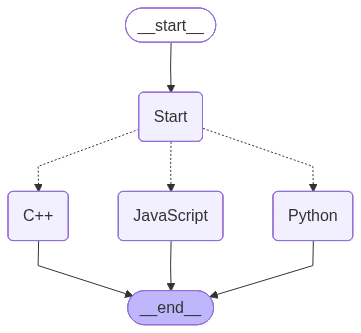

Starting project in Python
Creating a cpp project with name John starting project with Python


{'name': 'John starting project with Python creating a cpp project',
 'programming_language': 'C++'}

In [23]:
@dataclass
class DataClassState:
    name:str
    programming_language:Literal["Python","JavaScript","C++"]


def start_project(state:DataClassState)->DataClassState:
    print(f"Starting project in {state.programming_language}")
    return DataClassState(name=state.name+" starting project with "+state.programming_language,programming_language=state.programming_language)

def python_project(state:DataClassState):
    print(f"Creating a python project with name {state.name}")
    return DataClassState(name=state.name+" creating a python project",programming_language="Python")

def javascript_project(state:DataClassState):
    print(f"Creating a javascript project with name {state.name}")
    return DataClassState(name=state.name+" creating a javascript project",programming_language="JavaScript")

def cpp_project(state:DataClassState):
    print(f"Creating a cpp project with name {state.name}")
    return DataClassState(name=state.name+" creating a cpp project",programming_language="C++")

def decide_pl(state:DataClassState)->Literal["Python","JavaScript","C++"]:
    return random.choice(["Python","JavaScript","C++"])


builder=StateGraph(DataClassState)
builder.add_node("Start",start_project)
builder.add_node("Python",python_project)
builder.add_node("JavaScript",javascript_project)
builder.add_node("C++",cpp_project)

builder.add_edge(START,"Start")
builder.add_conditional_edges("Start",decide_pl)
builder.add_edge("Python",END)
builder.add_edge("JavaScript",END)
builder.add_edge("C++",END)

graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke(DataClassState(name="John",programming_language="Python"))
